In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
#Load property data
df = pd.read_csv(r'C:\Users\user\Documents\property_project\property_data.csv')
df.head()

(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0    BedRooms         954 non-null    float64
 1   Bath rooms        941 non-null    float64
 2   Size_sqft         1000 non-null   int64  
 3   location          1000 non-null   object 
 4   year built        1000 non-null   int64  
 5   Garage Available  896 non-null    float64
 6   Furnishing        843 non-null    object 
 7   House Condition   1000 non-null   object 
 8   Has_Pool          945 non-null    float64
 9   Lot Size          1000 non-null   float64
 10  Price($)          1000 non-null   int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 86.1+ KB


In [3]:
# Clean column names
df.columns = (
    df.columns
    .str.strip()                     # Remove leading/trailing spaces
    .str.lower()                    # Make all lowercase
    .str.replace(' ', '_')          # Replace spaces with underscores
    .str.replace('[^a-z0-9_]', '',regex=True)  # Remove special characters
)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   bedrooms          954 non-null    float64
 1   bath_rooms        941 non-null    float64
 2   size_sqft         1000 non-null   int64  
 3   location          1000 non-null   object 
 4   year_built        1000 non-null   int64  
 5   garage_available  896 non-null    float64
 6   furnishing        843 non-null    object 
 7   house_condition   1000 non-null   object 
 8   has_pool          945 non-null    float64
 9   lot_size          1000 non-null   float64
 10  price             1000 non-null   int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 86.1+ KB


In [4]:
#rename price column
df = df.rename(columns={'price': 'price_usd'})

df.columns

Index(['bedrooms', 'bath_rooms', 'size_sqft', 'location', 'year_built',
       'garage_available', 'furnishing', 'house_condition', 'has_pool',
       'lot_size', 'price_usd'],
      dtype='object')

In [5]:
df.head(20)

,bedrooms,bath_rooms,size_sqft,location,year_built,garage_available,furnishing,house_condition,has_pool,lot_size,price_usd
0,3.0,1.0,1149,Rural,2004,NaN,Unfurnished,new,0.0,0.15,244043
1,NaN,2.0,1169,Rural,1989,1.0,NaN,Old,0.0,0.23,211250
2,4.0,3.0,1409,Suburban,1993,1.0,Unfurnished,gd,0.0,0.19,257239
3,3.0,3.0,1647,Suburban,2021,0.0,NaN,new,0.0,0.27,310316
4,2.0,3.0,1865,Urban,2009,0.0,furnised,old,1.0,0.39,334791
5,2.0,2.0,1179,ruraal,2020,NaN,Semi furnished,Old,0.0,0.32,228260
6,1.0,2.0,2097,Suburban,2004,0.0,Semi-Furnished,new,0.0,0.33,361672
7,5.0,3.0,1392,Suburban,1993,1.0,Semi furnished,new,0.0,0.12,259003
8,3.0,1.0,1491,Rural,2014,0.0,Furnished,old,0.0,0.01,263096
9,4.0,2.0,1201,ruraal,2013,0.0,Semi-Furnished,gd,0.0,0.13,242759


In [6]:
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

bedrooms             46
bath_rooms           59
garage_available    104
furnishing          157
has_pool             55
dtype: int64


In [7]:
# Fill in missing values bedrooms and bath_rooms with median
df['bedrooms'] = df['bedrooms'].fillna(df['bedrooms'].median())
df['bath_rooms'] = df['bath_rooms'].fillna(df['bath_rooms'].median())

In [8]:
# Fill garage_available and has_pool missing values with No, we assume if it does not have, it means No
df['garage_available'] = df['garage_available'].fillna('No')
df['has_pool'] = df['has_pool'].fillna('No')

In [9]:
# Fill furnishing with the most common furnishing value
common_furnishing = df['furnishing'].mode()[0]
df['furnishing'] = df['furnishing'].fillna(common_furnishing)

In [10]:
print(df.isnull().sum())  # Counter check to see no missing values

bedrooms            0
bath_rooms          0
size_sqft           0
location            0
year_built          0
garage_available    0
furnishing          0
house_condition     0
has_pool            0
lot_size            0
price_usd           0
dtype: int64


In [11]:
# Check unique valeus in these columns
categories_columns = ['location', 'furnishing', 'house_condition']

for col in categories_columns:
    print(f"\n{col} unique values:")
    print(df[col].value_counts(dropna=False))


location unique values:
location
ruraal       177
sub-urban    176
Rural        172
Suburban     160
urbn         158
Urban        157
Name: count, dtype: int64

furnishing unique values:
furnishing
Semi-Furnished    353
Unfurnished       169
Furnished         165
furnised          157
Semi furnished    156
Name: count, dtype: int64

house_condition unique values:
house_condition
New     181
Good    174
old     171
new     163
gd      159
Old     152
Name: count, dtype: int64


In [12]:
# Convert to lowercase, strip spaces
for col in categories_columns:
    df[col] = df[col].str.lower().str.strip()


In [13]:
# standerdize values for 'house_condition'
df['house_condition'] = df['house_condition'].replace({
    'gd': 'good'
})

In [14]:
# standerdize values for 'furnishing'
df['furnishing'] = df['furnishing'].replace({
    'semi furnished': 'semi-furnished',
    'furnised': 'furnished'
})


In [15]:
# standerdize values for 'location'
df['location'] = df['location'].replace({
    'ruraal': 'rural',
    'suburban': 'sub-urban',
    'urbn': 'urban'
})

In [16]:
df['has_pool'].value_counts(dropna=False)

has_pool
0.0    680
1.0    265
No      55
Name: count, dtype: int64

In [17]:
print(df.dtypes)

bedrooms            float64
bath_rooms          float64
size_sqft             int64
location             object
year_built            int64
garage_available     object
furnishing           object
house_condition      object
has_pool             object
lot_size            float64
price_usd             int64
dtype: object


In [18]:
# Covert these columns to numeric
numerical_columns = ['bedrooms', 'bath_rooms', 'size_sqft', 'year_built', 'lot_size', 'price_usd']

for col in numerical_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')


In [19]:
# Check for missing values after conversion to numeric
print(df[numerical_columns].isnull().sum())

bedrooms      0
bath_rooms    0
size_sqft     0
year_built    0
lot_size      0
price_usd     0
dtype: int64


In [20]:
df.head(20)


,bedrooms,bath_rooms,size_sqft,location,year_built,garage_available,furnishing,house_condition,has_pool,lot_size,price_usd
0,3.0,1.0,1149,rural,2004,No,unfurnished,new,0.0,0.15,244043
1,3.0,2.0,1169,rural,1989,1.0,semi-furnished,old,0.0,0.23,211250
2,4.0,3.0,1409,sub-urban,1993,1.0,unfurnished,good,0.0,0.19,257239
3,3.0,3.0,1647,sub-urban,2021,0.0,semi-furnished,new,0.0,0.27,310316
4,2.0,3.0,1865,urban,2009,0.0,furnished,old,1.0,0.39,334791
5,2.0,2.0,1179,rural,2020,No,semi-furnished,old,0.0,0.32,228260
6,1.0,2.0,2097,sub-urban,2004,0.0,semi-furnished,new,0.0,0.33,361672
7,5.0,3.0,1392,sub-urban,1993,1.0,semi-furnished,new,0.0,0.12,259003
8,3.0,1.0,1491,rural,2014,0.0,furnished,old,0.0,0.01,263096
9,4.0,2.0,1201,rural,2013,0.0,semi-furnished,good,0.0,0.13,242759


In [21]:
import sqlite3

# Create/connect to SQLite database file
conn = sqlite3.connect('property_prices.db')

# Export cleaned DataFrame to SQL table
df.to_sql('cleaned_data', conn, if_exists='replace', index=False)

# # Close connection
# conn.close()

1000

In [22]:
# Read the data back from the SQLite database
df = pd.read_sql_query("SELECT * FROM cleaned_data", conn)
df.head()


,bedrooms,bath_rooms,size_sqft,location,year_built,garage_available,furnishing,house_condition,has_pool,lot_size,price_usd
0,3.0,1.0,1149,rural,2004,No,unfurnished,new,0.0,0.15,244043
1,3.0,2.0,1169,rural,1989,1.0,semi-furnished,old,0.0,0.23,211250
2,4.0,3.0,1409,sub-urban,1993,1.0,unfurnished,good,0.0,0.19,257239
3,3.0,3.0,1647,sub-urban,2021,0.0,semi-furnished,new,0.0,0.27,310316
4,2.0,3.0,1865,urban,2009,0.0,furnished,old,1.0,0.39,334791


In [23]:
# Get the current year
current_year = datetime.now().year

# Create new column 'house_age'
df['house_age'] = current_year - df['year_built']
df.head()

,bedrooms,bath_rooms,size_sqft,location,year_built,garage_available,furnishing,house_condition,has_pool,lot_size,price_usd,house_age
0,3.0,1.0,1149,rural,2004,No,unfurnished,new,0.0,0.15,244043,21
1,3.0,2.0,1169,rural,1989,1.0,semi-furnished,old,0.0,0.23,211250,36
2,4.0,3.0,1409,sub-urban,1993,1.0,unfurnished,good,0.0,0.19,257239,32
3,3.0,3.0,1647,sub-urban,2021,0.0,semi-furnished,new,0.0,0.27,310316,4
4,2.0,3.0,1865,urban,2009,0.0,furnished,old,1.0,0.39,334791,16


In [24]:
# Convert to lowercase strings
df['has_pool'] = df['has_pool'].astype(str).str.lower().str.strip()
df['garage_available'] = df['garage_available'].astype(str).str.lower().str.strip()

In [25]:
df['has_pool'] = df['has_pool'].map({'no': 0, '1': 1, '0': 0}).fillna(0).astype(int)
df['garage_available'] = df['garage_available'].map({'no': 0, '1': 1, '0': 0}).fillna(0).astype(int)

In [26]:
# This turns each category into its own column with 1s and 0s
df = pd.get_dummies(df, columns=['furnishing', 'house_condition', 'location'], drop_first=True)

In [27]:
df.info(1000)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   bedrooms                   1000 non-null   float64
 1   bath_rooms                 1000 non-null   float64
 2   size_sqft                  1000 non-null   int64  
 3   year_built                 1000 non-null   int64  
 4   garage_available           1000 non-null   int64  
 5   has_pool                   1000 non-null   int64  
 6   lot_size                   1000 non-null   float64
 7   price_usd                  1000 non-null   int64  
 8   house_age                  1000 non-null   int64  
 9   furnishing_semi-furnished  1000 non-null   bool   
 10  furnishing_unfurnished     1000 non-null   bool   
 11  house_condition_new        1000 non-null   bool   
 12  house_condition_old        1000 non-null   bool   
 13  location_sub-urban         1000 non-null   bool  

In [28]:
# X is all features (independent variables) Y is the target (what we’re predicting) — in this case, price_usd
X = df.drop('price_usd', axis=1)
y = df['price_usd']

In [29]:
# 80% for training, 20% for testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Check the shapes
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

X_train shape: (800, 14)
X_test shape: (200, 14)


In [30]:
# Create the model
model = LinearRegression()

In [31]:
# Fit the model to your training data
model.fit(X_train, y_train)

print("Model training complete.")

Model training complete.


In [32]:
# Coefficients for each feature
coefficients = pd.Series(model.coef_, index=X.columns)
print(coefficients.sort_values(ascending=False))


house_condition_new          1.035219e+04
bedrooms                     3.657665e+02
furnishing_unfurnished       1.883118e+02
size_sqft                    1.492542e+02
year_built                   1.003011e+02
garage_available             1.136868e-13
has_pool                    -1.818989e-12
house_age                   -1.003011e+02
bath_rooms                  -3.764373e+02
location_urban              -4.030733e+02
furnishing_semi-furnished   -4.739350e+02
lot_size                    -1.032485e+03
location_sub-urban          -2.205356e+03
house_condition_old         -5.853726e+03
dtype: float64


In [33]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Predict prices using the test data
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.4f}")


Mean Absolute Error (MAE): 7718.49
Mean Squared Error (MSE): 97746453.88
R² Score: 0.9739


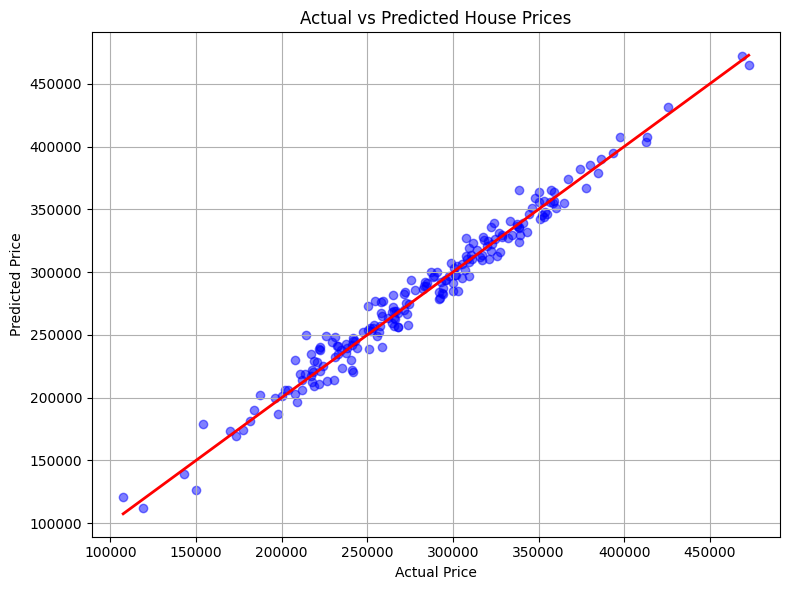

In [39]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')

# Add diagonal line for perfect predictions
min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], '-r', linewidth=2)  # red line

plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted House Prices")
plt.grid(True)
plt.tight_layout()
plt.show()


In [40]:
# save cleaned dataframe to CSV
df.to_csv('cleaned_property_data.csv', index=False)

# save to SQLite database
import sqlite3
conn = sqlite3.connect('property_prices.db')
df.to_sql('cleaned_data', conn, if_exists='replace', index=False)
conn.close()
